<a href="https://colab.research.google.com/github/SoojinY/thesesWordCloud/blob/main/(%EC%9E%91%EC%97%85%EC%9A%A9)_wordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://jehyunlee.github.io/2021/08/13/Python-DS-82-scopusapi/

https://www.kci.go.kr/kciportal/po/openapi/openApiConnView.kci



https://wonhwa.tistory.com/9 

# KCI 국내학술지 인용색인 정보 포탈

https://www.kci.go.kr/kciportal/po/openapi/openApiKeyRequestView.kci

Key : 	88687611

In [1]:
# 라이브러리 import
import requests # API 요청 보내기 위함
import pprint # xml 출력 확인 위함
import urllib # url 관련 작업

In [2]:
# url 입력
key =  '88687611' # KCI API 키
searchWord = '코로나' # 검색 단어
searchWord = urllib.parse.quote_plus(searchWord) # 검색 단어 URL 인코딩
count = str(100) # 검색 논문 수. KCI API 는 기본 10, 최대 100 까지 제공


In [3]:
url = 'https://open.kci.go.kr/po/openapi/openApiSearch.kci?apiCode=articleSearch'
url += '&key=' + key
url += '&keyword=' + searchWord
url += '&displayCount=' + count 
print("url :\n" + url)

url :
https://open.kci.go.kr/po/openapi/openApiSearch.kci?apiCode=articleSearch&key=88687611&keyword=%EC%BD%94%EB%A1%9C%EB%82%98&displayCount=100


In [4]:
# url 불러오기
response = requests.get(url, verify=False)
contents = response.text

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


# XML -> DataFame 변환 

https://wonhwa.tistory.com/16

In [ ]:
# 깔끔한 출력 위한 코드
pp = pprint.PrettyPrinter(indent=4)
print(pp.pprint(contents))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 '      <journalInfo>\r\n'
 '        <journal-name>물류학회지</journal-name>\r\n'
 '        <publisher-name>한국물류학회</publisher-name>\r\n'
 '        <pub-year>2020</pub-year>\r\n'
 '        <pub-mon>08</pub-mon>\r\n'
 '        <volume>30</volume>\r\n'
 '        <issue>4</issue>\r\n'
 '      </journalInfo>\r\n'
 '      <articleInfo article-id="ART002623594">\r\n'
 '        <article-categories>경영학</article-categories>\r\n'
 '        <article-regularity>Y</article-regularity>\r\n'
 '        <title-group>\r\n'
 '          <article-title lang="original"><![CDATA[코로나(COVID-19) 사태의 장기화로 인한 '
 '스트레스 수준은 모든 소비자가 동일할 것인가? -코로나 스트레스에 따른 소비자 세분시장에 관한 '
 '연구-]]></article-title>\r\n'
 '          <article-title lang="foreign"><![CDATA[COVID-19 Stress: Is the '
 'level of COVID-19 stress same for everybody? -Segmentation approach based on '
 'COVID-19 Stress level-]]></article-title>\r\n'
 '          <article-title lang="english"><![CDATA[COVID-19 Stress: Is the '
 'level 

In [5]:
### xml을 DataFrame으로 변환하기 ###
from os import name
import xml.etree.ElementTree as et
import pandas as pd
import bs4
from lxml import html
from urllib.parse import urlencode, quote_plus, unquote

In [6]:
xml_obj = bs4.BeautifulSoup(contents,'lxml-xml')
rows = xml_obj.findAll('record')
print(rows)

[<record>
<journalInfo>
<journal-name>한국사전학</journal-name>
<publisher-name>한국사전학회</publisher-name>
<pub-year>2020</pub-year>
<pub-mon>11</pub-mon>
<volume/>
<issue>36</issue>
</journalInfo>
<articleInfo article-id="ART002656882">
<article-categories>사전학</article-categories>
<article-regularity>Y</article-regularity>
<title-group>
<article-title lang="original">코로나-19 신어의 수집과 사용 양상 연구 - 주제 특정적 신어의 수집과 사용에 대한 고찰 -</article-title>
<article-title lang="foreign">COVID-19 Neologism Collection and Usage Pattern Analysis -Consideration of Topic-Specific Neologism Extraction and Usage Pattern Analysis-</article-title>
<article-title lang="english">COVID-19 Neologism Collection and Usage Pattern Analysis -Consideration of Topic-Specific Neologism Extraction and Usage Pattern Analysis-</article-title>
</title-group>
<author-group>
<author>이수진(경북대학교)</author>
<author>강현아(경북대학교)</author>
<author>남길임(경북대학교)</author>
</author-group>
<abstract-group>
<abstract lang="original">This paper collects and e

이전에 했던 데이터 추출 코드  
문제점: 데이터마다 세부 항목 수가 달라 오류


``` python
# 각 행의 컬럼, 이름, 값을 가지는 리스트 만들기
row_list = [] # 행값
name_list = [] # 열이름값
value_list = [] #데이터값

# xml 안의 데이터 수집
for i in range(0, len(rows)):
    columns = rows[i].find_all()
    #첫째 행 데이터 수집
    for j in range(0,len(columns)):
        if i ==0:
            # 컬럼 이름 값 저장
            name_list.append(columns[j].name)
        # 컬럼의 각 데이터 값 저장
        value_list.append(columns[j].text)
    # 각 행의 value값 전체 저장
    row_list.append(value_list)
    # 데이터 리스트 값 초기화
    value_list=[]
```

```python
name_list
```



필요한 열 이름만 남겨두고 정보 추출하기



In [7]:
# 데이터 확인 후 필요한 열만 리스트화 하여 정보 추출
name_list = [
  'pub-year'
  ,'pub-mon'
  ,'article-title-original'
  ,'article-title-english'
  ,'author'
  ,'abstract-original'
  ,'abstract-english'
  ,'url'             
]

In [8]:
data_list = [] # 데이터 담는 리스트
row_list = [] # 행 담는 리스트

for row in rows:
  col = row.find_all()
  row_list = [0]*8 # row_list 초기화

  for i in range(0, len(col)):
    
    name = col[i].name
    lang = col[i]['lang'] if col[i].has_attr('lang')  else ''
    text = col[i].text
    # name_list의 열에 맞춰 해당하는 text를 row_list에 저장
    if name == 'pub-year': row_list[0] = text
    elif name == 'pub-mon': row_list[1] = text
    elif name == 'url': row_list[7] = text
    elif name == 'author' and row_list[4] == 0: row_list[4] = text
    elif name == 'article-title':
      if lang == 'original': row_list[2] = text
      elif lang == 'english': row_list[3] = text
    elif name == 'abstract':
      if lang == 'original': row_list[5] = text
      elif lang == 'english': row_list[6] = text

  data_list.append(row_list) # row_list를 data_list에 저장
  row_list=[] # row_list 비우기

In [9]:
print(len(data_list))
data_list[0]

100


['2020',
 '11',
 '코로나-19 신어의 수집과 사용 양상 연구 - 주제 특정적 신어의 수집과 사용에 대한 고찰 -',
 'COVID-19 Neologism Collection and Usage Pattern Analysis -Consideration of Topic-Specific Neologism Extraction and Usage Pattern Analysis-',
 '이수진(경북대학교)',
 'This paper collects and examines Korean neologisms related to COVID-19 and analyzes their usage patterns. It also considers the methodology for the study of topic-specific neologisms. In order to achieve this, the paper follows two research frameworks: 1) “from COVID-19 to language”; 2) “from language to COVID-19”. The former examines the impact of COVID-19 on language and explores methods of collecting of COVID-19-related neologisms, for which it was first necessary to define the category of COVID-19 neologisms and discuss their distinguishing criteria. The second research framework explores how language informs us on the COVID-19 situation. The analysis of the time when a given COVID-19 neologism first appeared, the changes in occurrence frequency between

In [10]:
#xml값 DataFrame으로 만들기
df = pd.DataFrame(data_list, columns=name_list)
df.head(5)

,pub-year,pub-mon,article-title-original,article-title-english,author,abstract-original,abstract-english,url
0,2020,11,코로나-19 신어의 수집과 사용 양상 연구 - 주제 특정적 신어의 수집과 사용에 대...,COVID-19 Neologism Collection and Usage Patter...,이수진(경북대학교),This paper collects and examines Korean neolog...,This paper collects and examines Korean neolog...,https://www.kci.go.kr/kciportal/ci/sereArticle...
1,2021,06,포스트코로나 시대의 동시문학,The Children’s Poetry Literature of the Post-C...,방은수(서울교육대학교),이 연구의 목적은 포스트코로나 시대의 동시문학에 대해 탐색하는것이다. 먼저 감염병이...,The purpose of this study is to explore the ch...,https://www.kci.go.kr/kciportal/ci/sereArticle...
2,2021,08,코로나19와 사회보장법의 대응 — 핀란드와 한국의 사례 비교 —,Response of the Social Security System to COVI...,김남희(서울대학교 법학전문대학원),"코로나19의 전세계적 확산 이후 각국은 경제, 사회 전반의 위기를 겪고 있으며, 다...","Since the global spread of COVID-19, each coun...",https://www.kci.go.kr/kciportal/ci/sereArticle...
3,2020,04,신종 코로나바이러스 감염증(COVID-19) 유행의 대응과 치료,Coronavirus Disease 2019 (COVID-19): Pandemic ...,이승화(성남시의료원 가정의학과),중국에서 첫 발병한 신종 코로나바이러스(SARS-CoV-2)로 인한 감염증은 현재 ...,Infectious diseases caused by the novel corona...,https://www.kci.go.kr/kciportal/ci/sereArticle...
4,2020,12,포스트 코로나 예술 패러다임 전환과 전통공연예술의 사유와 모색,Transforming the Arts Paradigm: Korean Traditi...,김희선(국민대학교),본 고는 한국의 전통공연예술계를 중심으로 코로나 19 극복을 위한 대응과 다양한 시...,This paper examines the struggles and efforts ...,https://www.kci.go.kr/kciportal/ci/sereArticle...


In [ ]:
# dataframe 정보 확인하기
df.describe()

In [12]:
# null 값 확인하기
for i in range(8):
  print("col: "+ name_list[i])
  print(df[df[name_list[i]].isnull()])
  print("----------------------------------------------------------------------------------")

col: pub-year
Empty DataFrame
Columns: [pub-year, pub-mon, article-title-original, article-title-english, author, abstract-original, abstract-english, url]
Index: []
----------------------------------------------------------------------------------
col: pub-mon
Empty DataFrame
Columns: [pub-year, pub-mon, article-title-original, article-title-english, author, abstract-original, abstract-english, url]
Index: []
----------------------------------------------------------------------------------
col: article-title-original
Empty DataFrame
Columns: [pub-year, pub-mon, article-title-original, article-title-english, author, abstract-original, abstract-english, url]
Index: []
----------------------------------------------------------------------------------
col: article-title-english
Empty DataFrame
Columns: [pub-year, pub-mon, article-title-original, article-title-english, author, abstract-original, abstract-english, url]
Index: []
-------------------------------------------------------------

# 텍스트 전처리

title과 abstract로 각 논문들을 벡터화  
유사 논문들 항목 추리기



### 참고 문서

- https://hanshuginn.blogspot.com/2019/03/python-doc2vec.html  
- https://kmikey1004.tistory.com/2  
- https://wikidocs.net/102705  
- https://frhyme.github.io/python-libs/nlp_doc2vec_gensim/  
- https://hoonzi-text.tistory.com/19 (문서 군집화) 
- https://towardsdatascience.com/nlp-preprocessing-with-nltk-3c04ee00edc0 (텍스트 전처리)




In [37]:
import pandas, nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
nltk.download('stopwords')
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
stop_words = set(nltk.corpus.stopwords.words('english') )

def nltk_tokenizer(_wd):
  lower = _wd.lower() # 소문자로 전환
  no_punctuation = tokenizer.tokenize(lower) # 문장부호 제거 및 토큰화
  filtered_tokens = [token for token in no_punctuation if token not in stop_words] # stopwords 제거
  return filtered_tokens

In [39]:
df['abstract_token'] = df['abstract-english'].apply(nltk_tokenizer)

print("Abstract Tokens:")
print(df['abstract_token'][0])

Abstract Tokens:
['paper', 'collects', 'examines', 'korean', 'neologisms', 'related', 'covid', 'analyzes', 'usage', 'patterns', 'also', 'considers', 'methodology', 'study', 'topic', 'specific', 'neologisms', 'order', 'achieve', 'paper', 'follows', 'two', 'research', 'frameworks', 'covid', 'language', 'language', 'covid', 'former', 'examines', 'impact', 'covid', 'language', 'explores', 'methods', 'collecting', 'covid', 'related', 'neologisms', 'first', 'necessary', 'define', 'category', 'covid', 'neologisms', 'discuss', 'distinguishing', 'criteria', 'second', 'research', 'framework', 'explores', 'language', 'informs', 'us', 'covid', 'situation', 'analysis', 'time', 'given', 'covid', 'neologism', 'first', 'appeared', 'changes', 'occurrence', 'frequency', 'january', 'july', 'characteristics', 'semantic', 'categories', 'shed', 'light', 'changes', 'south', 'korea', 'politics', 'society', 'economy', 'culture', 'overall', 'lifestyle', 'koreans', 'owing', 'covid', 'value', 'paper', 'consists',

In [36]:
df['title_token'] = df['article-title-english'].apply(nltk_tokenizer)
df['abstract_token'] = df['abstract-english'].apply(nltk_tokenizer)

print("Title Tokens:")
print(df['title_token'][0])
print("Abstract Tokens:")
print(df['abstract_token'][0])

Title Tokens:
['covid', 'neologism', 'collection', 'usage', 'pattern', 'analysis', 'consideration', 'topic', 'specific', 'neologism', 'extraction', 'usage', 'pattern', 'analysis']
Abstract Tokens:
['paper', 'collects', 'examines', 'korean', 'neologisms', 'related', 'covid', 'analyzes', 'usage', 'patterns', 'also', 'considers', 'methodology', 'study', 'topic', 'specific', 'neologisms', 'order', 'achieve', 'paper', 'follows', 'two', 'research', 'frameworks', 'covid', 'language', 'language', 'covid', 'former', 'examines', 'impact', 'covid', 'language', 'explores', 'methods', 'collecting', 'covid', 'related', 'neologisms', 'first', 'necessary', 'define', 'category', 'covid', 'neologisms', 'discuss', 'distinguishing', 'criteria', 'second', 'research', 'framework', 'explores', 'language', 'informs', 'us', 'covid', 'situation', 'analysis', 'time', 'given', 'covid', 'neologism', 'first', 'appeared', 'changes', 'occurrence', 'frequency', 'january', 'july', 'characteristics', 'semantic', 'catego

# 방법 1) DOC2VEC

In [ ]:
doc_df = df[['article-title-original', 'abstract_token']].values.tolist()
tagged_data = [TaggedDocument(words=abstact_token, tags=[title]) for title, abstact_token in doc_df]

In [ ]:
print(len(df))
tagged_data[0]

100


TaggedDocument(words=['this', 'paper', 'collects', 'and', 'examines', 'korean', 'neologisms', 'related', 'to', 'covid', '19', 'and', 'analyzes', 'their', 'usage', 'patterns', 'it', 'also', 'considers', 'the', 'methodology', 'for', 'the', 'study', 'of', 'topic', 'specific', 'neologisms', 'in', 'order', 'to', 'achieve', 'this', 'the', 'paper', 'follows', 'two', 'research', 'frameworks', '1', 'from', 'covid', '19', 'to', 'language', '2', 'from', 'language', 'to', 'covid', '19', 'the', 'former', 'examines', 'the', 'impact', 'of', 'covid', '19', 'on', 'language', 'and', 'explores', 'methods', 'of', 'collecting', 'of', 'covid', '19', 'related', 'neologisms', 'for', 'which', 'it', 'was', 'first', 'necessary', 'to', 'define', 'the', 'category', 'of', 'covid', '19', 'neologisms', 'and', 'discuss', 'their', 'distinguishing', 'criteria', 'the', 'second', 'research', 'framework', 'explores', 'how', 'language', 'informs', 'us', 'on', 'the', 'covid', '19', 'situation', 'the', 'analysis', 'of', 'the'

In [ ]:
model = Doc2Vec(vector_size=150, window=10, min_count=2, workers=4)
model.build_vocab(tagged_data)

In [ ]:
max_epochs = 500

for epoch in range(max_epochs):
  if epoch%50 == 0:
    print('iteration {0}'.format(epoch))
  model.train(tagged_data,
              total_examples=model.corpus_count,
              epochs=model.iter)
  # decrease the learning rate
  model.alpha -= 0.002
  # fix the learning rate, no decay
  model.min_alpha = model.alpha

iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


iteration 50
iteration 100
iteration 150
iteration 200
iteration 250
iteration 300
iteration 350
iteration 400
iteration 450


[Doc2Vec 모델 정확도에 관한 글](https://stackoverflow.com/questions/61029524/how-to-measure-the-accuracy-of-a-doc2vec-model)  
unsupervised model

[모델 저장 로드에 관한 글](https://radimrehurek.com/gensim/models/doc2vec.html)
```python
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4

from gensim.test.utils import get_tmpfile

fname = get_tmpfile("my_doc2vec_model")

model.save(fname)
model = Doc2Vec.load(fname)  # you can continue training with the loaded model!
```

In [ ]:
# model.random.seed(9999)

import numpy as np

i = np.random.randint(len(df))

inferred_doc = df['abstract-original'][i].split(' ')
inferred_vector = model.infer_vector(inferred_doc)
return_docs  = model.docvecs.most_similar(positive=[inferred_vector],topn=5)

cloud_list = []
print(df['article-title-original'][i])
print(df['abstract-original'][i])
abstract = (i, df['abstract-original'][i])
cloud_list.append(abstract)

print()

for rd in return_docs:
  print(rd[1], rd[0])
  df_index = df.index[(df['article-title-original'] == rd[0])].tolist()
  df_index = df_index[0]
  abstract = (df_index, df['abstract-original'][df_index])
  cloud_list.append(abstract)
  print(abstract)

코로나19 약물치료의 최신지견
Since the coronavirus disease 2019 (COVID-19) outbreak, more than 150 million people in over 200 countries have been infected, with over 3 million people dying due to it, as of May 1, 2021. Many researchers are working continuously to find effective drug treatments for COVID-19; however, the optimal treatment approach remains unclear. In this article, current advances in pharmacological treatments for patients with COVID-19 are discussed. Data obtained from recent studies indicate a mortality benefit with the administration of dexamethasone or adjunctive tocilizumab and potential clinical benefits with remdesivir (with or without baricitinib). Several monoclonal antibodies against severe acute respiratory syndrome coronavirus 2 have been developed. The US Food and Drug Administration issued two emergency use authorizations: one for bamlanivimab/etesevimab and another for casirivimab/imdevimab for patients with mild to moderate COVID-19, at high risk of progression to s

In [ ]:
cloud_list

# 방법 2) sklearn으로 클러스터링

https://hoonzi-text.tistory.com/19
## k-means  
- 클러스터의 개수를 지정  
- 각 군집내 평균 벡터와 해당 군집에 속한 벡터간의 거리 제곱의 합이 최소가 되는 군집을 찾는 방법  
- 노이즈 데이터에 취약  
- 중심점을 임의로 잡기 때문에 군집 결과가 상이하거나 나쁠수 있다  

## k-means++ 
- kmeans 처럼 무작위로 중심점 잡는게 아니라 데이터 포인트 중에 하나를 선택하는 방법
- k-means 보다 군집의 결과가 좋다고 하고, 알고리즘의 속도 역시 빠르다고 한다 
- 고차원이고 sparse한 벡터(ex. 문서 tfidf 벡터) 간의 연산은 적합하지 않다고 한다(kmeans 역시 마찬가지)

## DBSCAN 
- 밀도 기반의 클러스터링
- 어느 특정 벡터부터 시작해 반경내 기준치 만큼의 점들이 존재한다면 군집화 하는 방식
- 일정 밀도 이상의 데이터를 기준으로 군집을 형성하기 때문에 노이즈 처리에 용이
- 이미 형성된 군집 기준으로 기준점을 옮겨가며 처리하기 때문에 분포가 이상한 데이터에도 강건
- kmeans에 비해 속도가 느리고, 파라미터 값인 epsilon, min-point 값에 영향을 많이 받는다.

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

vector = np.array(vector) # Normalizer를 이용해 변환된 벡터
model = DBSCAN(eps=0.3,min_samples=6, metric = "cosine")
# 거리 계산 식으로는 Cosine distance를 이용
result = model.fit_predict(vector)

# keyword 추출하여 워드클라우드 만들기


참고 자료
- https://pinkwink.kr/1324

In [ ]:
!pip install konlpy wordcloud 
# wordcloud 설치

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 4.7 MB/s 
     |████████████████████████████████| 453 kB 51.7 MB/s 


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from konlpy.corpus import kobill
from konlpy.tag import Okt

In [ ]:
!apt-get update - qq
!apt-get install fonts-nanum* -qq
# 한글 깨짐
import matplotlib.font_manager as fm

sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f]

E: The update command takes no arguments


['/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nan

In [ ]:
# 한글 폰트 적용
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family = font_name)
fm._rebuild()

NanumGothic Eco


In [ ]:
t = Okt() 

In [ ]:
tokens_ko = []
for cloud in cloud_list:
  tokens_ko.extend(t.nouns(cloud[1]))

In [ ]:
ko = nltk.Text(tokens_ko)

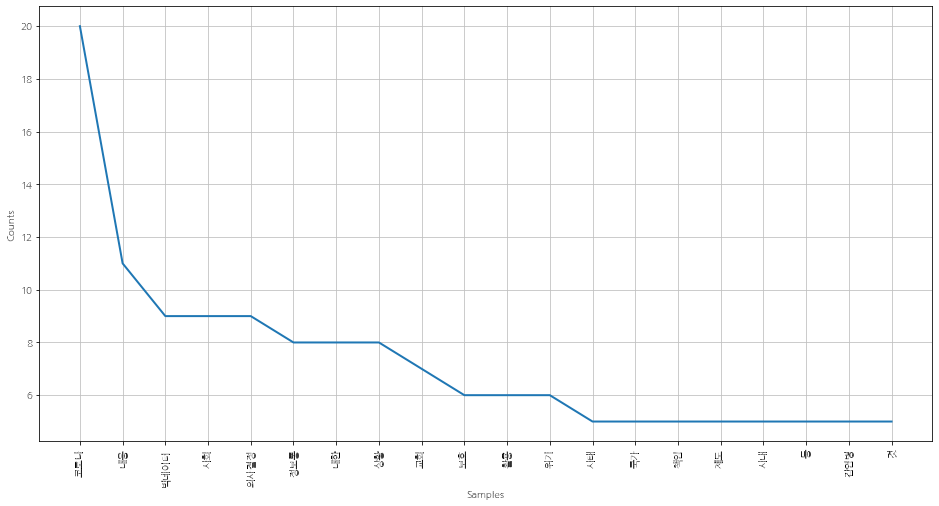

In [ ]:
plt.figure(figsize=(16,8))
ko.plot(20)
plt.show()

In [ ]:
data = ko.vocab().most_common(20)
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='white').generate_from_frequencies(dict(data))

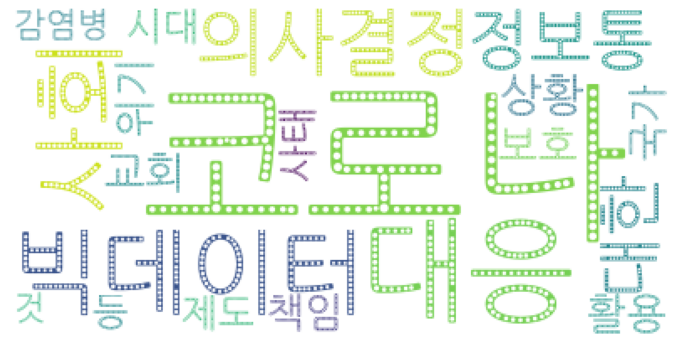

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis('off')
plt.show()